# **MELANOMA DETECTION**


**PROBLEM STATEMENT :**

Melanoma is a type of cancer that can be deadly if not detected early.

It accounts for 75% of skin cancer deaths.

A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC).

All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.



**The data set contains the following diseases:**

Actinic keratosis

Basal cell carcinoma

Dermatofibroma

Melanoma

Nevus

Pigmented benign keratosis

Seborrheic keratosis

Squamous cell carcinoma

Vascular lesion


**Importing all the important libraries**

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

**Import Skin Cancer Data**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from pathlib import Path
import pathlib

In [8]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("/content/drive/MyDrive/Cancer File/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/Cancer File/Test")

In [5]:
# Number of images in the train and test set

image_count_train = len(list(data_dir_train.glob("*/*.jpg")))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob("*/*.jpg")))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2367 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.



**Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.

**Create a dataset**

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

**Use 80% of the images for training, and 20% for validation.**


In [7]:
# TRAIN DATASET
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width, while writing the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
# VALIDATION DATASET
# Dataset is created using seed=123 and tf.keras.preprocessing.image_dataset_from_directory
# Resizing images to the size img_height*img_width, while writing the dataset


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### **Visualize the data**

code to visualize one instance of all the nine classes present in the dataset

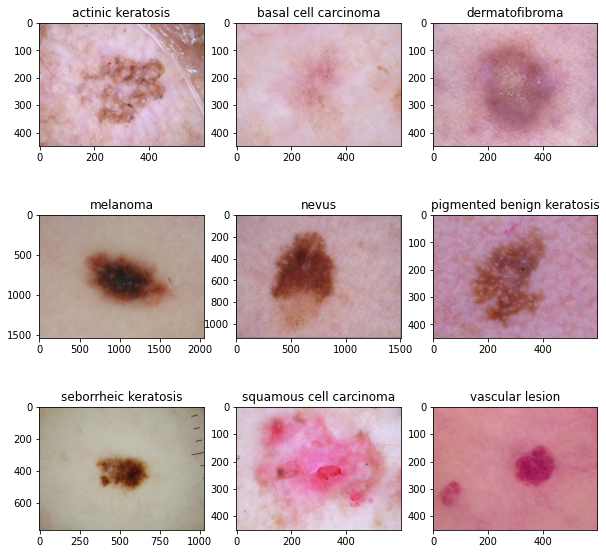

In [10]:
# Visualizing sample image from each class

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## **MODEL 1 :**


### **Create the model**

**Todo**: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [23]:
# Create a CNN model
# Using layers.experimental.preprocessing.Rescaling, normalize pixel values between (0,1)

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### **Compile the model**

Optimiser chosen in Adam and the loss function used for model training is SparseCategoricalCrossentropy.



In [24]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# View the summary of all layers

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### **Train the model**

In [16]:
# Train the model for 20 epochs 

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 787s 3s/step - loss: 2.0613 - accuracy: 0.1858 - val_loss: 2.0887 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 77ms/step - loss: 2.0104 - accuracy: 0.2076 - val_loss: 1.9219 - val_accuracy: 0.2998
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 1.9330 - accuracy: 0.2757 - val_loss: 1.9130 - val_accuracy: 0.2886
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 1.8712 - accuracy: 0.2902 - val_loss: 1.8550 - val_accuracy: 0.3199
Epoch 5/20
56/56 [==============================] - 4s 77ms/step - loss: 1.7828 - accuracy: 0.3214 - val_loss: 1.8734 - val_accuracy: 0.3043
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 1.6711 - accuracy: 0.3862 - val_loss: 1.6150 - val_accuracy: 0.3960
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5611 - accuracy: 0.4459 - val_loss: 1.5807 - val_accuracy: 0.4027
Epoch 8/20
56/56 [======

**Visualizing training results**

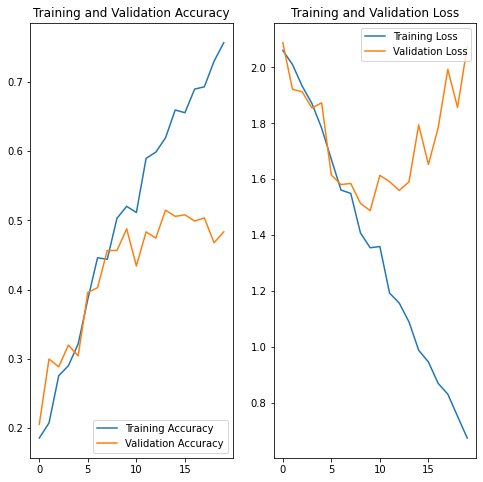

In [18]:
# Visualize the results 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finding on the first base model**


The model is overfitting because we can also see difference in loss functions in training & test

Training accuracy increases as the number of epochs increase wheras validation accuracy increases only for a first few epochs but then starts fluctuating and also the difference between training accuracy and validation accuracy is huge.

Also, training loss seems to decline with increase in epochs whereas validation loss increases after some epochs.

**Training accuracy**: ~ 0.75

**Validation accuracy** : ~ 0.48

These observations are a clear evidence of OVERFITTING.



**DATA AUGMENTATION**


In [17]:
# Since the model overfits, data augumentation strategy is used
# Data augmentation is artificially increasing the amount of data needed to train robust AI models

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",
                                                                          input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), 
                                                                          width_factor=(0.2, 0.3), fill_mode='reflect')
])

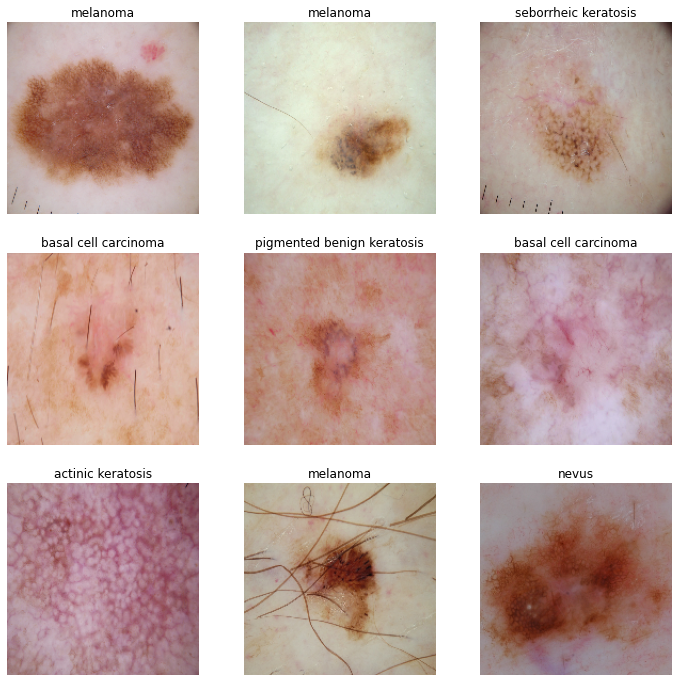

In [19]:
# Visualize the augmentation strategy and let us see how it works for one instance of training image

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## **MODEL 2 :**


**Create the model**

In [39]:
# Let us create a new model with Dropout layer and l2 regularizer as the previous model overfits
# Use the augmented data for creating the model
# Let us add one more layer to improve accuracy

model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer with Dropout layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# 2nd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

# 3rd convolution layer with Dropout layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# 4th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())

# Fully connected layer 1 with l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.02)))

# Fully connected layer 2 with Dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.10))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))


### **Compiling the model**

In [40]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
# View the summary of all layers

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

### **Training the model**


In [42]:
## training model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 104ms/step - loss: 3.7177 - accuracy: 0.1702 - val_loss: 2.2916 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 2.1429 - accuracy: 0.1869 - val_loss: 2.0911 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 2.0549 - accuracy: 0.2003 - val_loss: 2.0472 - val_accuracy: 0.3378
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.9008 - accuracy: 0.3080 - val_loss: 1.7781 - val_accuracy: 0.3579
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.7267 - accuracy: 0.3605 - val_loss: 1.6891 - val_accuracy: 0.3848
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.6782 - accuracy: 0.3756 - val_loss: 1.6226 - val_accuracy: 0.4004
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.6481 - accuracy: 0.4040 - val_loss: 1.6509 - val_accuracy: 0.3758
Epoch 8/20


### **Visualizing the results**


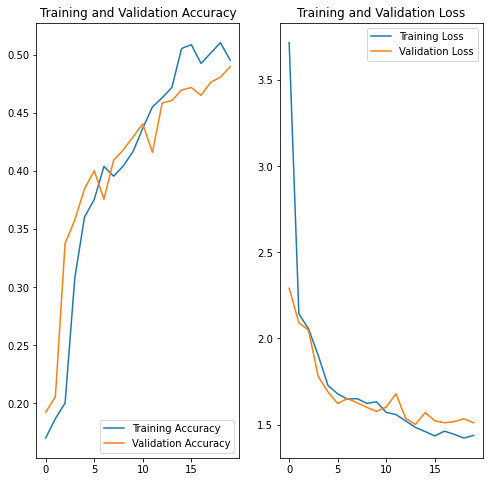

In [43]:
# Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings from the 2nd model-**

As we can see that the difference between the training 

accuracy and validation accuracy has been shrinked compared to previous model and also it is maintained along every epochs.

Thus overfitting its handled in this model by data augmentation and regularizations like Dropout layers and L2 regularizer.

**Training accuracy** : ~ 0.49

**Validation accuracy** : ~ 0.48

**Training loss** : ~ 1.4368

**Validation loss** : ~ 1.5105

Still, there is a scope for improvement in accuracy. Let us focus on class imbalance issue and resolve it to get better accuracy and also it aids in preventing overfitting.


**DISTRIBUTION OF CLASSES IN THE TRAINING DATASET :**
Many a times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others.

Class imbalance can have a detrimental effect on the final model quality.

Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:

path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
1,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
2,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
3,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
4,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion
2235,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion
2236,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion
2237,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion


In [27]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
1,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
2,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
3,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
4,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion
2235,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion
2236,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion
2237,/content/drive/MyDrive/Cancer File/Train/vascu...,vascular lesion


<BarContainer object of 9 artists>

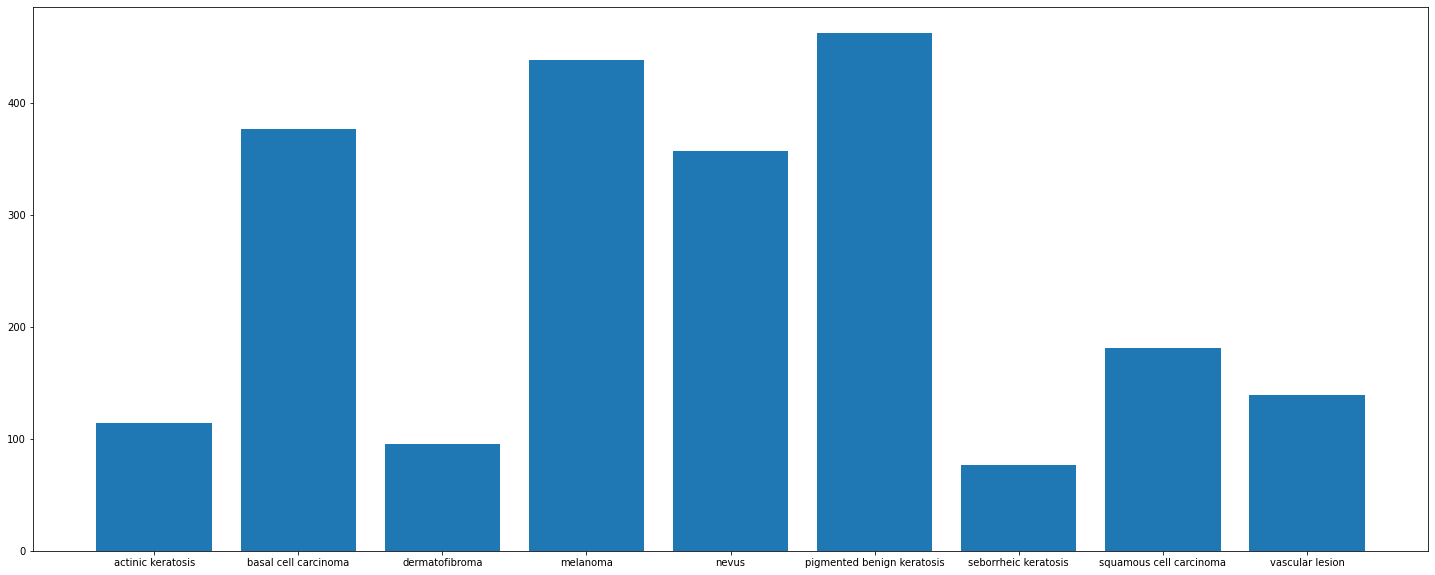

In [32]:
# Plot bar graph to interpret class imbalance in the dataset

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


**Write your findings here:**

**Which class has the least number of samples?**

**Which classes dominate the data in terms proportionate number of samples?** 

**Answer-1:-**  seborrheic keratosis cells has least number of samples

**Answer-2:-** actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes

We can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.


In [37]:
pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [38]:
#path_to_training_dataset ="/content/drive/MyDrive/Cancer File/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/Cancer File/Train" ,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEDB61A9D90>: 100%|██████████| 500/500 [00:46<00:00, 10.81 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEE49100FD0>: 100%|██████████| 500/500 [00:39<00:00, 12.73 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEDB6D5CB90>: 100%|██████████| 500/500 [00:46<00:00, 10.77 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEDB6036E50>: 100%|██████████| 500/500 [00:47<00:00, 10.43 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEE49100990>: 100%|██████████| 500/500 [00:48<00:00, 10.26 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEDB6C6C450>: 100%|██████████| 500/500 [00:44<00:00, 11.28 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEDB6D7C5D0>: 100%|██████████| 500/500 [00:54<00:00,  9.13 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEDB6C97190>: 100%|██████████| 500/500 [00:41<00:00, 12.19 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Cancer File/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEDB6C97C10>: 100%|██████████| 500/500 [00:37<00:00, 13.22 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.
Lets take a look at total count of augmented images.

In [44]:
# Total number of added new samples
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Cancer File/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [45]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
1,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
2,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
3,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
4,/content/drive/MyDrive/Cancer File/Train/actin...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/Cancer File/Train/outpu...,vascular lesion
6735,/content/drive/MyDrive/Cancer File/Train/outpu...,vascular lesion
6736,/content/drive/MyDrive/Cancer File/Train/outpu...,vascular lesion
6737,/content/drive/MyDrive/Cancer File/Train/outpu...,vascular lesion


In [46]:
# Check for the number of images in each class

new_df['Label'].value_counts()

pigmented benign keratosis    1453
melanoma                      1331
basal cell carcinoma          1105
nevus                         1083
squamous cell carcinoma        522
vascular lesion                398
actinic keratosis              339
dermatofibroma                 282
seborrheic keratosis           226
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

**Let us train the model on the data created using Augmentor**


In [15]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9


In [1]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer Detection /Train/output")
data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer File/Train/output")

In [2]:
data_dir_train1


PosixPath('/content/drive/MyDrive/Cancer File/Train/output')

In [3]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


**Create a training dataset**

In [11]:

data_dir_train1=pathlib.Path("/content/drive/MyDrive/Cancer File/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


**Create a validation dataset**


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


**Create the model**

In [16]:
# Let us create a new model with augmented data along with the original data

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

# 1st convolution layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolution layer 
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 3rd convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 4th convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5th convolution layer with Dropout layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layer 1 with Dropout layer and l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0105)))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(num_classes, activation = "softmax"))

**Compile the model**


In [84]:
# Compile the model using 'adam' optimizer and 'SparseCategoricalCrossentropy' loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
# View the summary of all layers

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 45, 45, 32)       

**Train the model**

In [ ]:
# Train the model for 30 epochs

epochs =30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### **Todo**: Visualize the model results


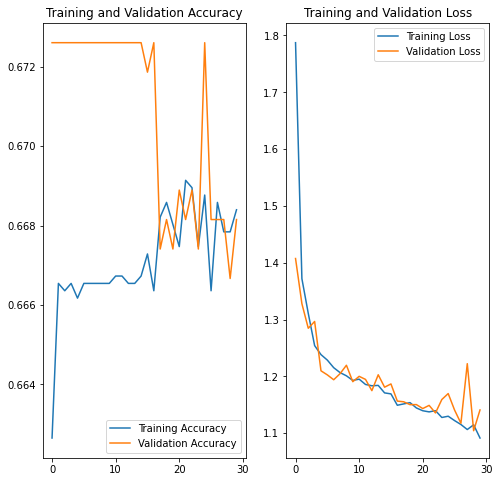

In [67]:
# Visualize the results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings from 3rd Model** -

It is evident that class imbalance issue is resolved with Augmentor and we could see an improvement in accuracy.

Overfitting issue is also handled as the difference in training accuracy and validation accuracy is remarkably less and By resolving class imbalance issue and using regularizations like dropout layers and l2 regularizers, we obtained better accuracy.

**Training accuracy** : ~ 0.66

**Validation accuracy** : ~ 0.66

Still there may be scope for improvement in accuracy if we increase the number of epochs or number of layers in the model.

